In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/airplane-accidents-severity-dataset/sample_submission.csv
/kaggle/input/airplane-accidents-severity-dataset/test.csv
/kaggle/input/airplane-accidents-severity-dataset/train.csv


In [85]:
import pandas as pd
sample_submission = pd.read_csv("../input/airplane-accidents-severity-dataset/sample_submission.csv")
test = pd.read_csv("../input/airplane-accidents-severity-dataset/test.csv",index_col='Accident_ID')
train = pd.read_csv("../input/airplane-accidents-severity-dataset/train.csv",index_col='Accident_ID')

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


In [87]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,,
7570,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
12128,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2181,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
9054,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [88]:
train['Severity'].replace('Minor_Damage_And_Injuries',0,inplace=True)
train['Severity'].replace('Significant_Damage_And_Fatalities',1,inplace=True)
train['Severity'].replace('Significant_Damage_And_Serious_Injuries',2,inplace=True)
train['Severity'].replace('Highly_Fatal_And_Damaging',3,inplace=True)

In [89]:
train['Severity'].value_counts()

3    3049
2    2729
0    2527
1    1695
Name: Severity, dtype: int64

In [90]:
'''from sklearn.utils import resample
df0 = train[train['Severity']==0]
df1 = train[train['Severity']==1]
df2 = train[train['Severity']==2]
df3 = train[train['Severity']==3]

df_1 = resample(df1,replace=True,n_samples=3000,random_state=123)
df_0 = resample(df0,replace=True,n_samples=3000,random_state=123) 
 
train = pd.concat([df_1, df2, df3, df_0])
 

train['Severity'].value_counts()'''

"from sklearn.utils import resample\ndf0 = train[train['Severity']==0]\ndf1 = train[train['Severity']==1]\ndf2 = train[train['Severity']==2]\ndf3 = train[train['Severity']==3]\n\ndf_1 = resample(df1,replace=True,n_samples=3000,random_state=123)\ndf_0 = resample(df0,replace=True,n_samples=3000,random_state=123) \n \ntrain = pd.concat([df_1, df2, df3, df_0])\n \n\ntrain['Severity'].value_counts()"

In [91]:
x=train.drop('Severity',axis=1)
y=train['Severity']

In [92]:
l_quan=['Safety_Score','Control_Metric','Turbulence_In_gforces','Cabin_Temperature','Max_Elevation','Adverse_Weather_Metric','Total_Safety_Complaints']
l_cato=['Days_Since_Inspection','Accident_Type_Code','Violations']

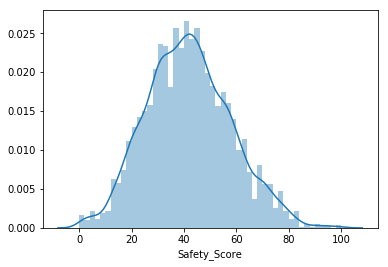

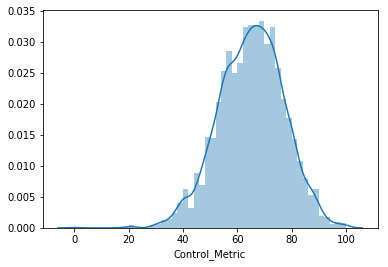

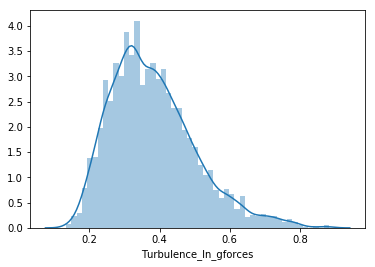

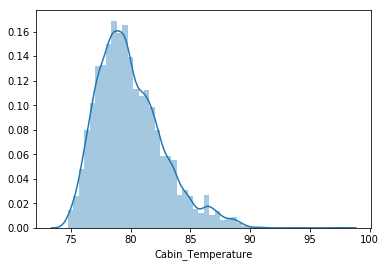

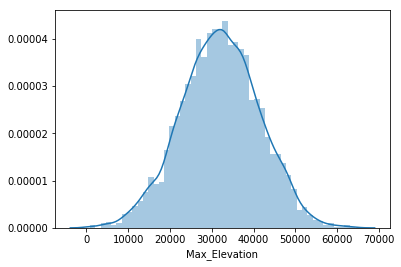

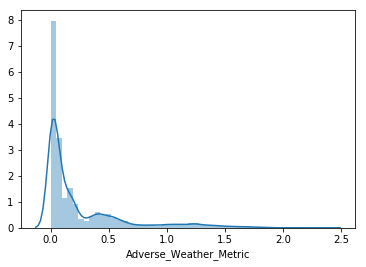

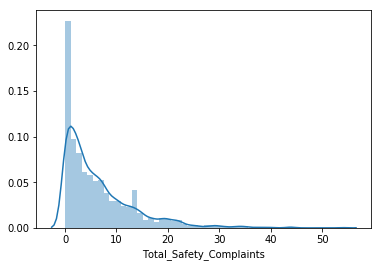

In [93]:
for a in l_quan:
    sns.distplot(x[a])
    plt.show()

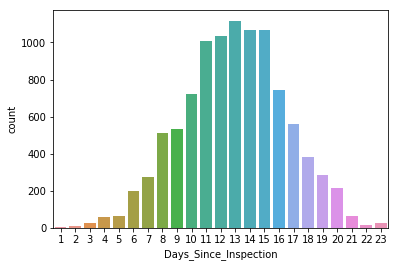

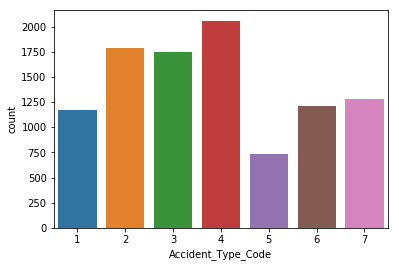

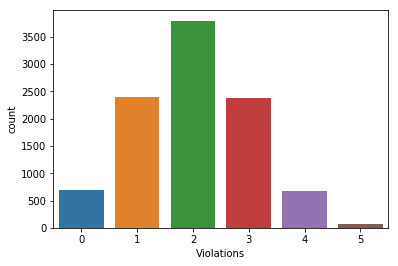

In [94]:
for a in l_cato:
    sns.countplot(x[a])
    plt.show()

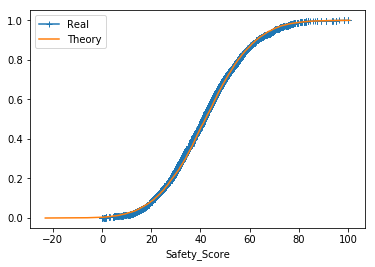

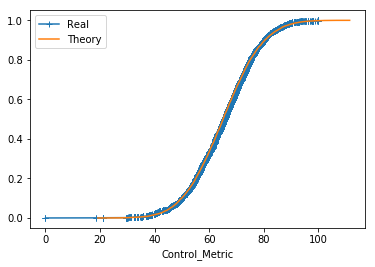

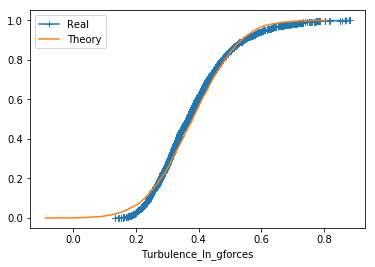

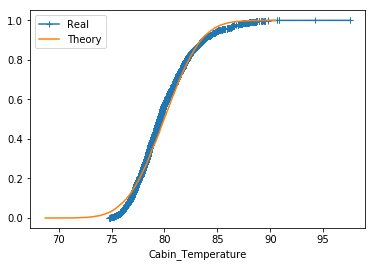

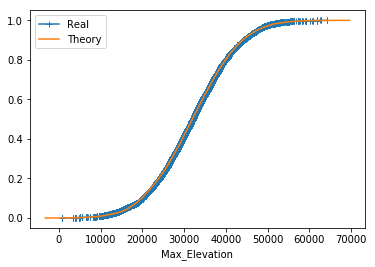

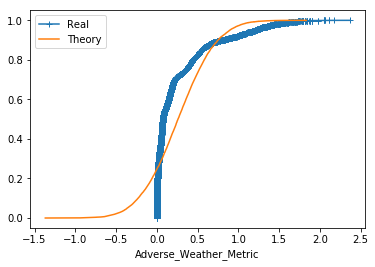

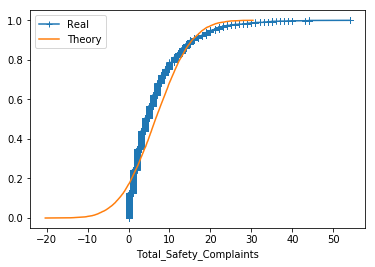

In [95]:
for a in l_quan:
    x1,y1=ecdf(x[a])
    x2,y2=ecdf(np.random.normal(np.mean(x[a]),np.std(x[a]),size=10000))
    plt.plot(x1,y1,marker='+',linestyle=None)
    plt.xlabel(a)
    plt.plot(x2,y2)
    plt.legend(['Real', 'Theory'])
    plt.show()
    

In [96]:
x['Total_Safety_Complaints'].corr(train['Severity'])

-0.023385328903464068

In [97]:
for a in l_quan:
    print(x[a].corr(train['Severity']))
    print(a)
    print()
    

-0.34573041677548405
Safety_Score

0.1224573747140999
Control_Metric

-0.08514996401026045
Turbulence_In_gforces

0.011648696240299511
Cabin_Temperature

-0.0011932958042195356
Max_Elevation

-0.028106494576919498
Adverse_Weather_Metric

-0.023385328903464068
Total_Safety_Complaints



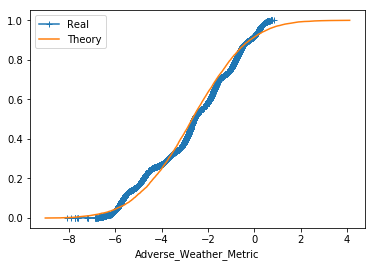

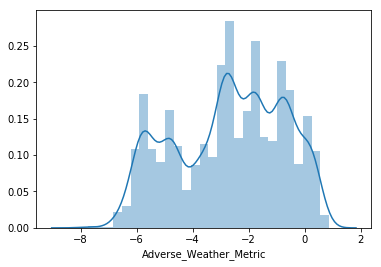

In [98]:
    x['Adverse_Weather_Metric']=np.log(x['Adverse_Weather_Metric'])
    x1,y1=ecdf(x['Adverse_Weather_Metric'])
    x2,y2=ecdf(np.random.normal(np.mean(x['Adverse_Weather_Metric']),np.std(x['Adverse_Weather_Metric']),size=10000))
    plt.plot(x1,y1,marker='+',linestyle=None)
    plt.xlabel('Adverse_Weather_Metric')
    plt.plot(x2,y2)
    plt.legend(['Real', 'Theory'])
    plt.show()
    sns.distplot(x['Adverse_Weather_Metric'])

In [99]:
x['Total_Safety_Complaints']=np.log(x['Total_Safety_Complaints']+1)
x['Total_Safety_Complaints'].unique()

array([3.13549422, 3.33220451, 2.83321334, 2.30258509, 3.25809654,
       0.        , 2.39789527, 1.60943791, 3.71357207, 2.48490665,
       1.09861229, 2.7080502 , 0.69314718, 1.38629436, 1.79175947,
       2.07944154, 3.04452244, 3.36729583, 2.56494936, 2.19722458,
       2.77258872, 2.94443898, 3.58351894, 1.94591015, 2.89037176,
       2.63905733, 2.99573227, 3.4657359 , 3.52636052, 3.29583687,
       3.40119738, 3.21887582, 3.09104245, 3.4339872 , 3.80666249,
       3.68887945, 3.55534806, 3.17805383, 4.00733319, 3.49650756,
       3.63758616, 3.61091791, 3.66356165, 3.78418963])

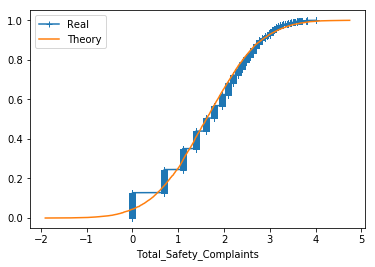

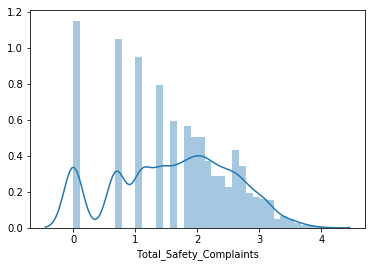

In [100]:

x1,y1=ecdf(x['Total_Safety_Complaints'])
x2,y2=ecdf(np.random.normal(np.mean(x['Total_Safety_Complaints']),np.std(x['Total_Safety_Complaints']),size=10000))
plt.plot(x1,y1,marker='+',linestyle=None)
plt.xlabel('Total_Safety_Complaints')
plt.plot(x2,y2)
plt.legend(['Real', 'Theory'])
plt.show()
sns.distplot(x['Total_Safety_Complaints'])

In [101]:
test['Total_Safety_Complaints']=np.log(test['Total_Safety_Complaints']+1)
test['Adverse_Weather_Metric']=np.log(test['Adverse_Weather_Metric'])

In [102]:
x.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,
7570,49.223744,14,3.135494,71.285324,0.272118,78.04,2,31335.476824,3,-0.857192
12128,62.465753,10,3.332205,72.288058,0.423939,84.54,2,26024.711057,2,-1.043130
2181,63.059361,13,2.833213,66.362808,0.322604,78.86,7,39269.053927,3,-5.694652
5946,48.082192,11,2.302585,74.703737,0.337029,81.79,3,42771.499200,1,-1.552452
9054,26.484018,13,3.258097,47.948952,0.541140,77.16,3,35509.228515,2,-1.732265


In [103]:
test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,
1,19.497717,16,1.945910,72.151322,0.388959,78.32,4,37949.724386,2,-2.663663
10,58.173516,15,1.386294,64.585232,0.250841,78.60,7,30194.805567,2,-5.886240
14,33.287671,15,1.386294,64.721969,0.336669,86.96,6,17572.925484,1,-5.445335
17,3.287671,21,1.791759,66.362808,0.421775,80.86,3,40209.186341,2,-1.609486
21,10.867580,18,1.098612,56.107566,0.313228,79.22,2,35495.525408,2,-0.726299


In [104]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler().fit(x[l_quan])

In [105]:
x_quan=pd.DataFrame(ss.transform(x[l_quan]),columns=l_quan,index=x.index)
x[l_quan]=x_quan
x.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,
7570,0.455303,14,1.611091,0.516733,-0.901749,-0.699134,2,-0.070649,3,0.957777
12128,1.275888,10,1.819935,0.601122,0.349922,1.656279,2,-0.633736,2,0.861378
2181,1.312673,13,1.290165,0.102462,-0.485516,-0.401990,7,0.770528,3,-1.550182
5946,0.384562,11,0.726805,0.804422,-0.366593,0.659758,3,1.141883,1,0.597322
9054,-0.953841,13,1.741256,-1.447221,1.316177,-1.018021,3,0.371883,2,0.504099


In [106]:
test_quan=pd.DataFrame(ss.transform(test[l_quan]),columns=l_quan,index=test.index)
test[l_quan]=test_quan
test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,
1,-1.386771,16,0.348129,0.589614,0.061532,-0.597670,4,0.630643,2,0.021220
10,1.009905,15,-0.246006,-0.047136,-1.077161,-0.496206,7,-0.191591,2,-1.649510
14,-0.532230,15,-0.246006,-0.035629,-0.369566,2.533217,6,-1.529857,1,-1.420925
17,-2.391281,21,0.184470,0.102462,0.332084,0.322753,3,0.870208,2,0.567753
21,-1.921566,18,-0.551433,-0.760604,-0.562817,-0.271536,2,0.370430,2,1.025638


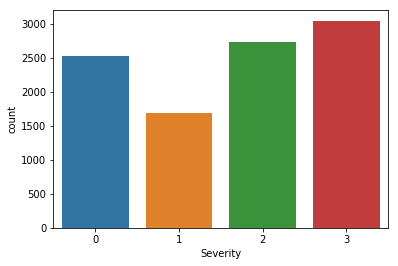

In [107]:
sns.countplot(y)

In [108]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=343,stratify=y)

In [127]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier(n_estimators=200,max_depth=4,verbose=True)


In [128]:
cross_val_score(gbc,X_train,y_train,cv=3)

      Iter       Train Loss   Remaining Time 
         1        5573.1402            8.31s
         2        4970.7655            8.28s
         3        4494.6739            8.27s
         4        4111.2985            8.24s
         5        3770.6332            8.25s
         6        3485.7869            8.22s
         7        3244.6255            8.21s
         8        3027.4578            8.16s
         9        2837.8835            8.11s
        10        2665.7638            8.15s
        20        1526.9907            7.69s
        30        1074.2819            7.03s
        40         816.4880            6.56s
        50         692.7997            6.07s
        60         589.5855            5.60s
        70         505.8557            5.13s
        80         430.9505            4.71s
        90         365.9037            4.28s
       100         318.1926            3.88s
       200          61.0409            0.00s
      Iter       Train Loss   Remaining Time 
        

array([0.95760171, 0.94815767, 0.95152295])

In [129]:
gbc.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1        8381.4627           12.68s
         2        7515.0514           12.44s
         3        6828.3589           12.43s
         4        6242.0836           12.43s
         5        5749.8057           12.38s
         6        5324.7418           12.35s
         7        4954.2998           12.33s
         8        4613.8290           12.28s
         9        4333.2337           12.22s
        10        4068.4234           12.21s
        20        2311.6131           11.30s
        30        1591.1553           10.43s
        40        1240.3020            9.65s
        50        1021.2557            8.95s
        60         861.9350            8.28s
        70         746.2262            7.69s
        80         643.5782            7.05s
        90         556.8752            6.41s
       100         480.4156            5.79s
       200         116.9170            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=True,
                           warm_start=False)

In [130]:
gbc.score(X_train,y_train)

1.0

In [131]:
gbc.score(X_test,y_test)

0.962

In [114]:
ans=gbc.predict(test)

In [115]:
sample_submission.head()

,Accident_ID,Severity
0,1,Minor_Damage_And_Injuries
1,10,Highly_Fatal_And_Damaging
2,14,Highly_Fatal_And_Damaging
3,17,Significant_Damage_And_Serious_Injuries
4,21,Minor_Damage_And_Injuries


In [116]:
test.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric'],
      dtype='object')

In [117]:
test['Severity']=ans

In [118]:
test['Severity'].replace(0,'Minor_Damage_And_Injuries',inplace=True)
test['Severity'].replace(1,'Significant_Damage_And_Fatalities',inplace=True)
test['Severity'].replace(2,'Significant_Damage_And_Serious_Injuries',inplace=True)
test['Severity'].replace(3,'Highly_Fatal_And_Damaging',inplace=True)

In [119]:
test.drop(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric'],axis=1,inplace=True)

In [120]:
test.head()

,Severity
Accident_ID,
1,Highly_Fatal_And_Damaging
10,Significant_Damage_And_Fatalities
14,Significant_Damage_And_Serious_Injuries
17,Highly_Fatal_And_Damaging
21,Significant_Damage_And_Fatalities


In [121]:
test.to_csv('ans.csv')